In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import pandas as pd

import sys
sys.path.insert(0,'../')

from nnAudio import Spectrogram
import torchaudio

import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

if torch.cuda.is_available():
    device = "cuda:0"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [2]:
y_list = np.load('./y_list.npy')

In [3]:
t_start = time.time()
mel_layer = Spectrogram.MelSpectrogram(sr=44100)
time_used = time.time()-t_start
print(time_used)

STFT filter created, time used = 5.9618 seconds
Mel filter created, time used = 0.0049 seconds
5.968202352523804


In [3]:
y_torch = torch.tensor(y_list, dtype=torch.float)

In [5]:
spec = mel_layer(y_torch)

In [5]:
specgram.shape

torch.Size([1770, 128, 157])

In [4]:
import torch

In [5]:
dummy_tensor = torch.randn((1770,128,157)).to(device)

In [7]:
del dummy_tensor

In [4]:
timing = []

for e in range(20):
    t_start = time.time()
    specgram = torchaudio.transforms.MelSpectrogram(sample_rate=44100, n_fft=2048, hop_length=512)(y_torch)
    time_used = time.time()-t_start
    print(time_used)
    timing.append(time_used)

0.053719282150268555
0.009754180908203125
0.04337000846862793
0.04604387283325195
0.04603838920593262
0.04455852508544922
0.044003963470458984
0.0439755916595459
0.04386448860168457
0.042867183685302734
0.04285311698913574
0.04272627830505371
0.04274320602416992
0.04271960258483887
0.04265427589416504
0.04267382621765137
0.0426177978515625
0.04238557815551758
0.042584896087646484
0.04262948036193848


In [7]:
print("mean = ",np.mean(timing))
print("std = ", np.std(timing))

mean =  0.04167299270629883
std =  0.005431833473591667


In [8]:
data = pd.DataFrame(timing,columns=['t_avg'])
data['Type'] = 'torchaudio_GPU'

In [9]:
data.to_csv('Mel_torchaudio_GPU')

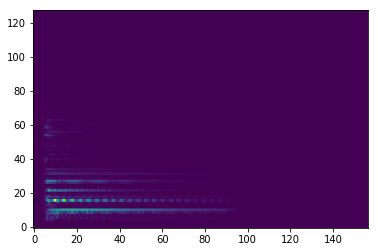

In [10]:
plt.imshow(specgram[0].cpu().numpy(), aspect='auto', origin='lower')

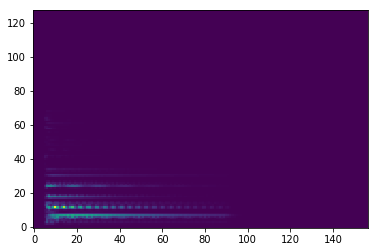

In [9]:
plt.imshow(spec[0].cpu().numpy(), aspect='auto', origin='lower')